# RakamTanima CNN

---


**Colab** için kimlik doğrulama adımları:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


### Kurulum ve Kontroller

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2407279128855580233
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16449839802649334978
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

### Uygulama Başlangıç

In [27]:
from __future__ import print_function
import keras
import random
import tensorflow
import numpy as np
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras import backend as K

import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Veriden örnekleri görselleştirme

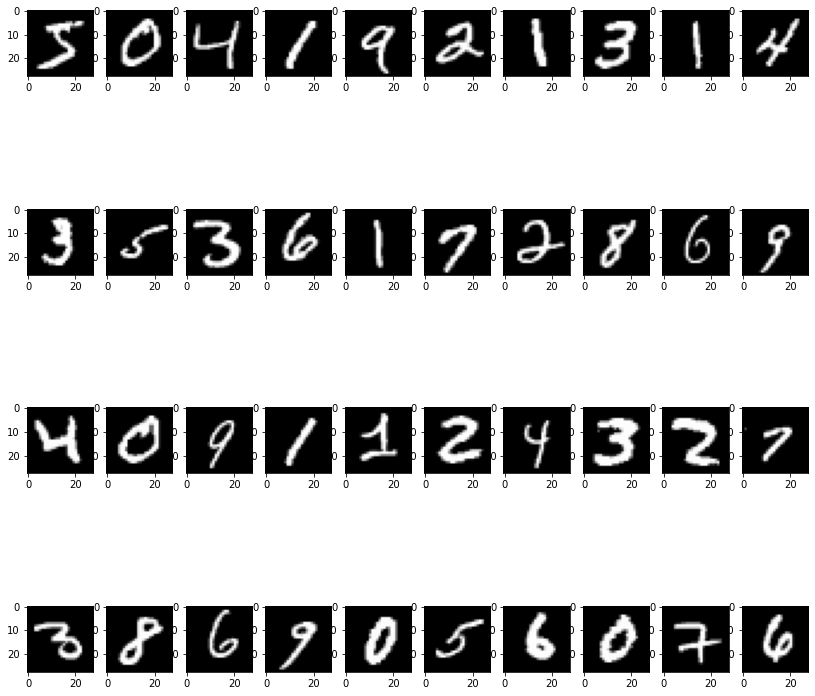

In [6]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [7]:
batch_size = 128 
num_classes = 10 
epochs = 32

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

## MODEL OLUŞTURMA

In [9]:
model = Sequential() 

**Katmanların oluşturulması**

In [10]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

 
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

Modell Görselleştirme


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [12]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = tensorflow.keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

### Eğitim İşlemleri

In [14]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/16
469/469 [==============================] - 4s 9ms/step - loss: 1.4035 - accuracy: 0.5645 - val_loss: 0.9003 - val_accuracy: 0.7587
Epoch 2/16
469/469 [==============================] - 4s 9ms/step - loss: 1.3782 - accuracy: 0.5766 - val_loss: 0.8602 - val_accuracy: 0.7691
Epoch 3/16
469/469 [==============================] - 4s 9ms/step - loss: 1.3420 - accuracy: 0.5853 - val_loss: 0.8229 - val_accuracy: 0.7789
Epoch 4/16
469/469 [==============================] - 4s 9ms/step - loss: 1.3205 - accuracy: 0.5935 - val_loss: 0.7953 - val_accuracy: 0.7877
Epoch 5/16
469/469 [==============================] - 4s 9ms/step - loss: 1.2891 - accuracy: 0.6043 - val_loss: 0.7638 - val_accuracy: 0.7981
Epoch 6/16
469/469 [==============================] - 4s 9ms/step - loss: 1.2605 - accuracy: 0.6139 - val_loss: 0.7291 - val_accuracy: 0.8093
Epoch 7/16
469/469 [==============================] - 4s 9ms/step - loss: 1.2399 - accuracy: 0.6227 - val_loss: 0.7031 - val_accuracy: 0.8150
Epoch 

In [15]:
model.save('./mnist_model.h5')

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])


Test Loss: 0.5143961906433105
Test Accuracy: 0.8711000084877014


## Rastgele değer için test işlemi

In [17]:
model_test = model.save('save_models/mnist_model.h5')

In [49]:
from typing import Dict


def render_bar(per: float, max_len=25):
    fill = round(max_len * per)
    left = max_len - fill
    return f"|{'█' * fill}{' ' * left}|"


def plot_activation(p_list, labels: Dict[int, str]) -> None:
    for i, val in enumerate(p_list):
        print(f"{labels[i]: <4}: {render_bar(val)} {val: .3f} %")


In [45]:
class_names = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9"
}

0   : |                         |  0.001 %
1   : |█████████████████████████|  0.990 %
2   : |                         |  0.001 %
3   : |                         |  0.006 %
4   : |                         |  0.000 %
5   : |                         |  0.000 %
6   : |                         |  0.001 %
7   : |                         |  0.000 %
8   : |                         |  0.002 %
9   : |                         |  0.000 %
The predicted class is 1


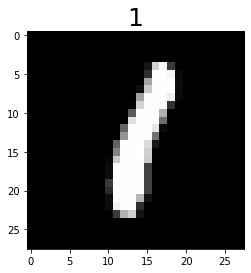

In [88]:
rnd = random.randint(0, len(x_test))
test_image = x_test[rnd]
title_image = np.argmax(y_test[rnd])
plt.imshow(test_image.reshape(28,28), cmap='gray', vmin=2, vmax=255)
plt.title(f"{title_image}", fontsize=25)

# Predict
test_image = np.expand_dims(test_image, axis=0)
pred = model.predict(test_image)
plot_activation(pred[0], class_names)
output_class = np.argmax(pred)
print("The predicted class is", output_class)